##Logistic Regression

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def newton_method(X, y, Hessian, Gradient,beta_old):
  #print("hess")
  hessian = Hessian(X, y, beta_old)
  #print("grad")
  gradient = Gradient(X, y, beta_old)
  beta_new = beta_old - np.dot(np.linalg.inv(hessian), gradient)
  #print("hess")
  #we need to iterate, lets 100 times
  for _ in range(100):
    hessian = Hessian(X, y, beta_new)
    gradient = Gradient(X, y, beta_new)
    beta_new = beta_new - np.dot(np.linalg.pinv(hessian), gradient)
  return beta_new

In [24]:
"""
Algorithm taked from Elements of Statistical Learning, 2ed. page: 120
"""
class mylogreg:
  def __init__(self):
    self.beta = 0

  def sigmoid(self,x, beta):
    #print(x)
    a = 0
    #print(x)
    #print(beta)
    for i in range(len(x)):
      a += beta[i]*x[i]
    return 1/(1 + np.exp(-a))


  def grad_log_K2(self,X, y, beta):
    N = len(X)
    sum = 0
    for i in range(N):
      sum += np.dot(X[i], (y[i] - self.sigmoid(X[i], beta)))
    return sum

  def hessian_log_K2(self,X, y, beta):
    N = len(X)
    sum = 0
    #print(X)
    #print(X.shape)
    for i in range(N):
      temp = np.dot(X[i][:, np.newaxis], X[i][np.newaxis, :])
      #print(X[i].T)
      #print(X[i])
      temp *= self.sigmoid(X[i],beta)*(1 - self.sigmoid(X[i],beta))
      sum += temp
    return -1*sum

  #cannot have L1 regularization

  def fit(self, X, y):
    X = np.c_[np.ones((X.shape[0], 1)), X] #for intercepto
    #print(X.shape)
    beta = [0]*(X.shape[1])

    #print(beta)

    self.beta = newton_method(X, y, self.hessian_log_K2, self.grad_log_K2, beta)
    #print(self.beta)
  def predict_proba(self,X, y):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    probas = []
    for i in range(len(X)):
      proba = 0
      temp = np.dot(y[i], self.beta.T)
      temp = np.dot(temp, X[i])
      val = self.sigmoid(X[i], self.beta)
      log = np.log(val)
      proba += temp - log
      probas.append(proba)
    return probas

  def predict(self,X):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    #print(X)
    #print(self.beta)
    #print(a)
    arr = []
    for j in range(len(X)):
      val = self.sigmoid(X[j], self.beta)
      if val > 0.5:
        arr.append(1)
      else:
        arr.append(0)
    return arr

(100000, 2)


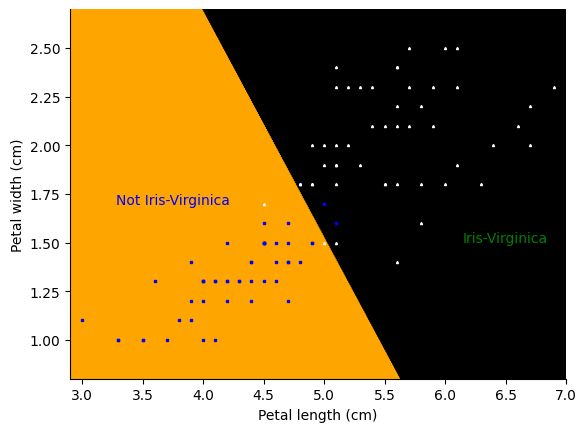

In [25]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from ipywidgets import interact, FloatSlider, fixed



iris = datasets.load_iris()

#from https://github.com/probml/pyprobml/blob/master/notebooks/book1/02/iris_logreg.ipynb
# petal length, petal width
train_x = iris["data"][:, (2, 3)]

# 1 if Iris-Virginica, else 0
train_y = (iris["target"] == 2).astype(jnp.int32)
fig, ax = plt.subplots(1, 1)
ax.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], "bs", markersize=1.5)
ax.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "g^", markersize=1.5)

clf = LogisticRegression(random_state=0)
clf.fit(train_x, train_y)

# Test data

# # Generate values for petal length and petal width
test_featvec_x0, test_featvec_x1 = jnp.meshgrid(
    jnp.linspace(2.9, 7, 500),
    jnp.linspace(0.8, 2.7, 200),
)

#print(test_featvec_x0.shape)
#print(test_featvec_x1.shape)

test_x = jnp.c_[test_featvec_x0.ravel(), test_featvec_x1.ravel()]
print(test_x.shape)
#print(test_x)

predict = clf.predict(test_x)
predict_proba = clf.predict_proba(test_x)

#print(predict.shape)



ax.plot(test_x[predict == 0, 0], test_x[predict == 0, 1], "orange", markersize=1.5)
ax.plot(test_x[predict == 1, 0], test_x[predict == 1, 1], "black", markersize=1.5)
ax.text(3.75, 1.70, "Not Iris-Virginica", color="b", ha="center")
ax.text(6.5, 1.5, "Iris-Virginica", color="g", ha="center")
ax.set_xlabel("Petal length (cm)")
ax.set_ylabel("Petal width (cm)")
ax.axis([2.9, 7, 0.8, 2.7])
#ax.clabel(contour, inline=1)
ax.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], "bs", markersize=1.5)
ax.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "w^", markersize=1.5)

sns.despine()
plt.show()

# Create decision boundary

(150, 2)
(150,)
[38.47314146381555, 37.87694125746505, 37.28074105111454, 36.68454084476404, 36.088340638413534, 35.49214043206303, 34.89594022571252, 34.29974001936201, 33.70353981301152, 33.10733960666102, 32.51113940031051, 31.914939193960016, 31.31873898760952, 30.722538781259043, 30.12633857490857, 29.530138368558127, 28.93393816220775, 28.337737955857467, 27.741537749507366, 27.145337543157584, 26.54913733680841, 25.952937130460317, 25.356736924114173, 24.76053671777159, 24.164336511435472, 23.56813630511108, 22.971936098807976, 22.375735892543503, 21.779535686349178, 21.18333548028216, 20.587135274446247, 19.99093506902983, 19.394734864374904, 18.79853466110221, 18.202334460338577, 17.606134264129405, 17.009934076187537, 16.413733903252545, 15.81753375755814, 15.221333661311084, 14.625133654821235, 14.02893381125935, 13.4327342634454, 12.836535252474786, 12.240337215984086, 11.644140948368996, 11.047947891603924, 10.451760663109361, 9.855584013839858, 9.25942656707957, 8.6633039

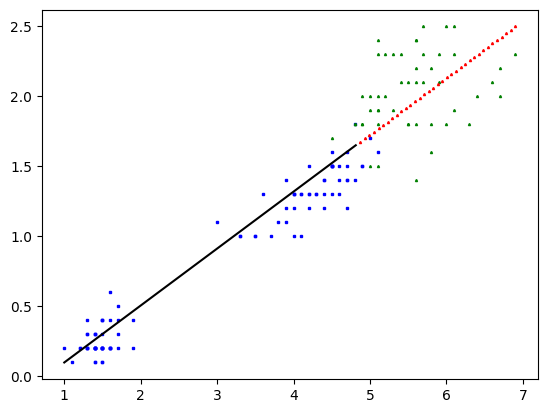

In [26]:
#Test with mine.

print(train_x.shape)
print(train_y.shape)

lr = mylogreg()
lr.fit(train_x, train_y)
#print(train_x)
#print(train_y)
#print(beta)
x_range = np.linspace(train_x.min(axis=0), train_x.max(axis=0), 100)
#print(x_range)
y_pred = lr.predict(x_range)
y_pred = np.array(y_pred)
fig, ax = plt.subplots(1, 1)
ax.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], "bs", markersize=1.5)
ax.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "g^", markersize=1.5)
ax.plot(x_range[y_pred == 0, 0], x_range[y_pred == 0, 1], "black", markersize=1.5)
ax.plot(x_range[y_pred == 1, 0], x_range[y_pred == 1, 1], "r^", markersize=1.5)

#print(y_pred)


proba = lr.predict_proba(x_range, y_pred)
print(proba)

In [28]:
#true test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_x, train_y, test_size=0.8, random_state=0)

lr = mylogreg()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

getit = 0
for i in range(len(y_predict)):
  if y_predict[i] == y_test[i]:
    getit += 1
print(getit/len(y_test))

print(y_predict)
print(y_test)

test_size = np.linspace(0.01, 0.8, 20)
precision = []
for i in range(len(test_size)):
  precision.append([])
for x in range(100):
  for i in range(len(test_size)):
    X_train, X_test, y_train, y_test = train_test_split(
      train_x, train_y, test_size=test_size[i], random_state=0)
    lr = mylogreg()
    lr.fit(X_train, y_train)

    y_predict = lr.predict(X_test)

    getit = 0
    for j in range(len(y_predict)):
      if y_predict[j] == y_test[j]:
        getit += 1
    precision[i].append(getit/len(y_test))

<ipython-input-24-1614c41fc086>:15: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-a))


0.925
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1]


In [29]:
print(precision)

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

In [34]:

print(len(precision))
means = np.mean(precision, axis=1)
stds = np.std(precision, axis=1)

20


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.11022302e-16, 1.11022302e-16,
       2.22044605e-16, 2.22044605e-16, 0.00000000e+00, 0.00000000e+00,
       3.33066907e-16, 1.11022302e-16, 0.00000000e+00, 1.11022302e-16,
       1.11022302e-16, 0.00000000e+00, 1.11022302e-16, 0.00000000e+00])

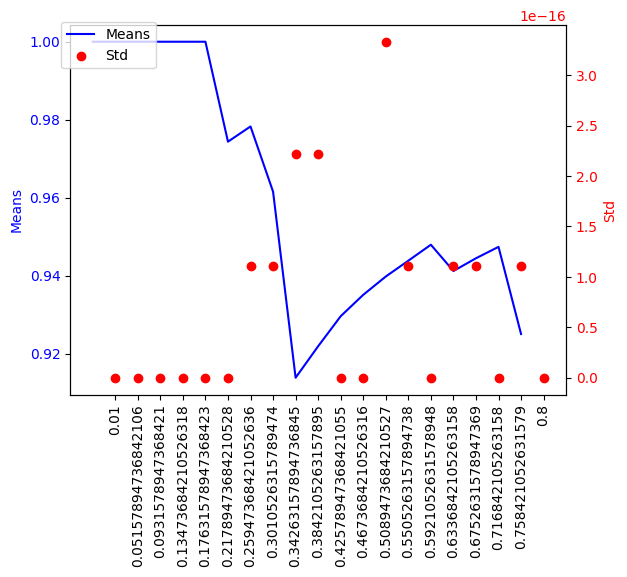

In [42]:
fig, ax1 = plt.subplots()
ax1.plot(means, 'b-', label="Means")
ax1.set_ylabel("Means", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks((range(1, len(stds) + 1)), test_size, rotation=90)


ax2 = ax1.twinx()

# Scatter plot (eixo direito)
ax2.scatter(x=(range(1, len(stds) + 1)), y=stds, color='r', marker='o', label="Std")
ax2.set_ylabel("Std", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adicionando legendas
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()